In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [299]:
data = pd.read_csv("suicide_data.csv") #loading suicide data

In [300]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Questions of interest
   1. Are suicides related to age and generation?
   2. What are the most suicidal countries?
   3. Are suicides related to the economy of the countries?
   4. Is sex related to suicides numbers?

# Some data preprocessing

In [301]:
data.isna().any() # verifying missing values

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

## Imputing HDI for year variable

<AxesSubplot:>

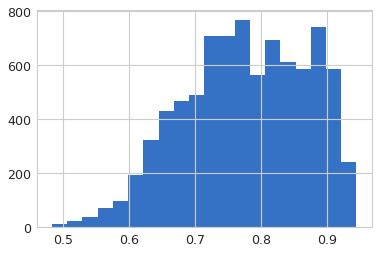

In [302]:
data['HDI for year'].hist(bins = 20) #visualizing data distribution

In [303]:
# Defining a function to fix missing values by taking the mean of HDI values in a country
def HDI_fix(dataset, country):
    #calculating the number of NaN's
    data1 = dataset[dataset['country'] == country].iloc[:,8:9]
    try:
        trues = np.array(data1.isna().value_counts().loc[True,:])[0]
    except KeyError as error:
        trues = 0
    
    try:
        if trues > 0:
            imp = SimpleImputer(strategy='mean')

            imp.fit(data1)
            data_transform = imp.transform(data1)
            data1['HDI for year'] = data_transform
            dataset[dataset['country'] == country]['HDI for year']
            dataset.loc[dataset['country'] == country, 'HDI for year'] = data1['HDI for year']
    except ValueError as error_2:
        print(f'{country} has no reported any HDI data\n')
    #return dataset

In [305]:
#Aplying above function to every country:
countries = list(set(data['country'].values))

for country in countries:
    HDI_fix(data,country)

Aruba has no reported any HDI data

Saint Kitts and Nevis has no reported any HDI data

Republic of Korea has no reported any HDI data

Cabo Verde has no reported any HDI data

Puerto Rico has no reported any HDI data

Russian Federation has no reported any HDI data

Macau has no reported any HDI data

Mongolia has no reported any HDI data

Kiribati has no reported any HDI data

San Marino has no reported any HDI data

Dominica has no reported any HDI data



# Some basic EDA

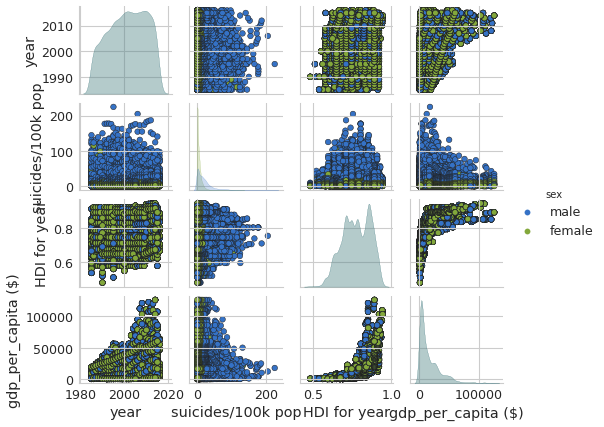

In [317]:
#First, we select the numerical variables of interest
#to see graphic relationships and correlations
variables = ['country', 'year', 'sex',
             'age', 'suicides/100k pop',
            'HDI for year', 'gdp_per_capita ($)',
            'generation']
numerical = ['year',]
sns.pairplot(data[variables], hue = 'sex', height = 1.5, aspect=1.2 ,
            plot_kws=dict(edgecolor="k", linewidth=0.5))

<AxesSubplot:xlabel='suicides/100k pop', ylabel='gdp_per_capita ($)'>

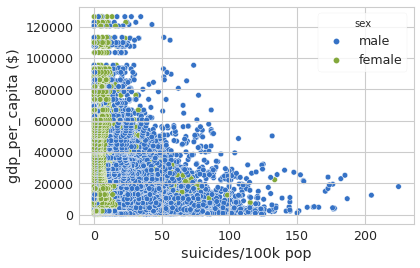

In [320]:
sns.scatterplot(data=data[variables], x = 'suicides/100k pop',
               y = 'gdp_per_capita ($)', hue = 'sex')

<AxesSubplot:xlabel='suicides/100k pop', ylabel='HDI for year'>

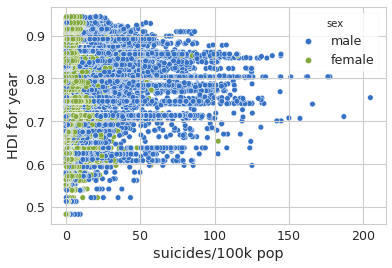

In [321]:
sns.scatterplot(data=data[variables], x = 'suicides/100k pop',
               y = 'HDI for year', hue = 'sex')

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

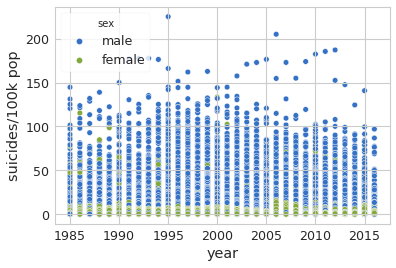

In [322]:
sns.scatterplot(data=data[variables], y = 'suicides/100k pop',
               x = 'year', hue = 'sex')

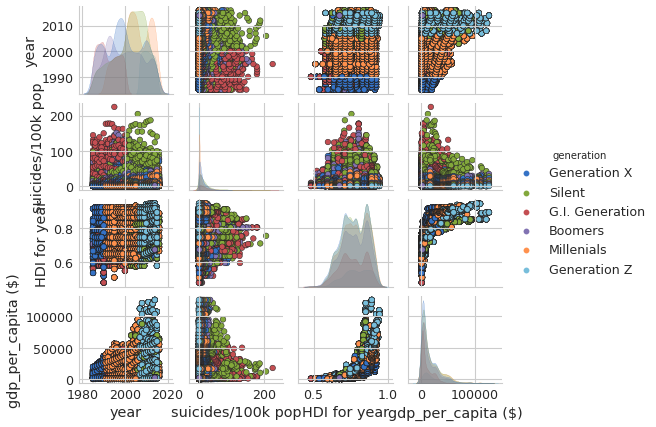

In [319]:
#now, we graph by generation:
sns.pairplot(data[variables], hue = 'generation', height = 1.5, aspect=1.2 ,
            plot_kws=dict(edgecolor="k", linewidth=0.5))

<AxesSubplot:xlabel='suicides/100k pop', ylabel='year'>

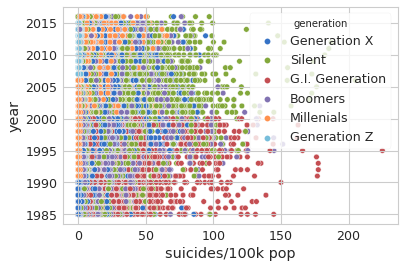

In [323]:
sns.scatterplot(data = data[variables], x = data['suicides/100k pop'],
               y = data['year'], hue = 'generation', )

## Top suicidal countries

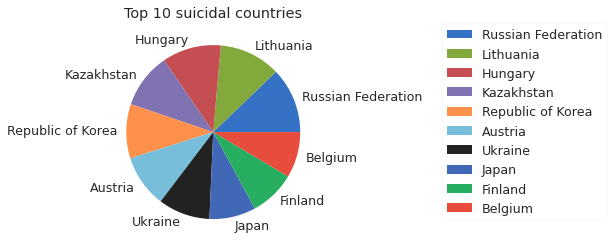

In [449]:
group = data[['country', 'suicides/100k pop']].groupby('country')
total_suicides = group.sum()
top_10 = total_suicides.sort_values(by = 'suicides/100k pop', ascending = False).head(10)
top_10.plot.pie(y = 'suicides/100k pop', ylabel = "", title = "Top 10 suicidal countries")
plt.legend(bbox_to_anchor=(1.55, 1), loc=2, borderaxespad=0.)

## Correlation

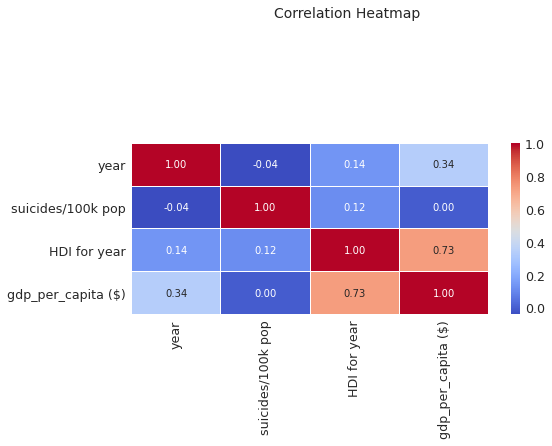

In [326]:
f, ax = plt.subplots(figsize=(8, 5))
corr = data[variables].corr()
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.6)
t= f.suptitle('Correlation Heatmap', fontsize=14)

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='HDI for year'>

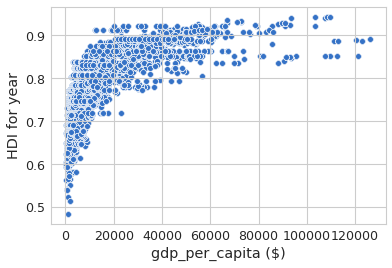

In [329]:
# since gdp_pc is highly related to HDI, we plot the two variables
sns.scatterplot(data=data[variables], x = data['gdp_per_capita ($)'],
               y = data['HDI for year'])

# Analysis of Mexico

In [354]:
suicides_mexico = data[data['country'] == 'Mexico']
suicides_usa = data[data['country'] == 'United States']

## Correlation heat map for Mexico and USA

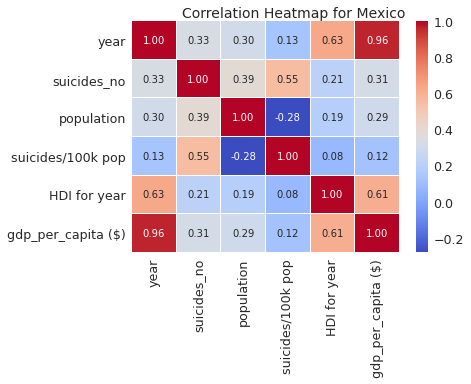

In [408]:
f, ax = plt.subplots(figsize=(6,4))
corr = suicides_mexico.corr()
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap for Mexico', fontsize=14)

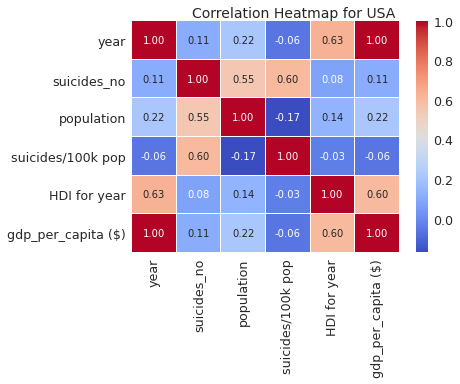

In [409]:
f, ax = plt.subplots(figsize=(6, 4))
corr = suicides_usa.corr()
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap for USA', fontsize=14)

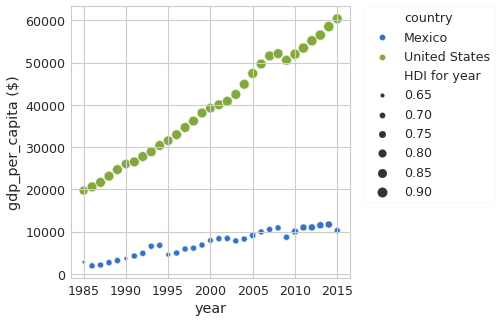

In [370]:
#Because there is a relation between year-gdp_pc-HDI, we plot the relations for Mexico
both_countries = pd.concat([suicides_mexico,suicides_usa], axis = 0)

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data = both_countries, x = 'year',
                y = 'gdp_per_capita ($)', size = 'HDI for year', 
                sizes=(10, 100), hue = 'country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

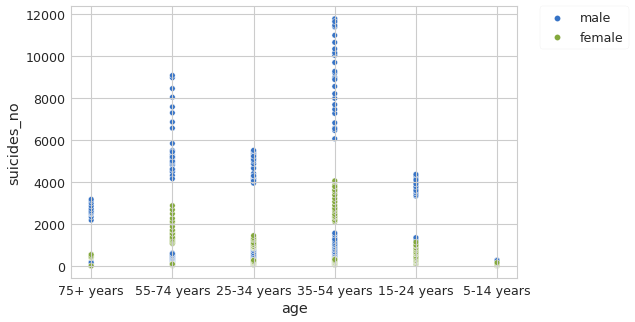

In [380]:
#age vs. suicides by sex
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data = both_countries, x = 'age',
                y = 'suicides_no', sizes=(10, 100), hue = 'sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


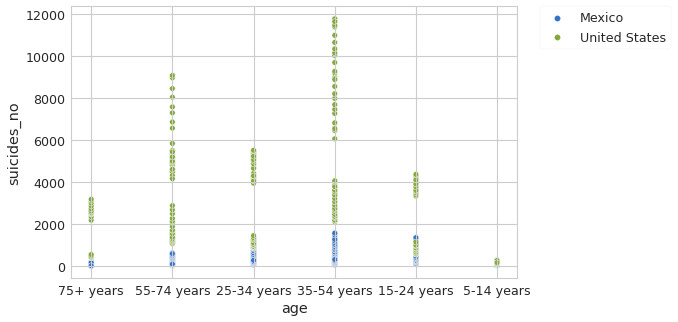

In [382]:
#age vs. suicides by country
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data = both_countries, x = 'age',
                y = 'suicides_no', sizes=(10, 100), hue = 'country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


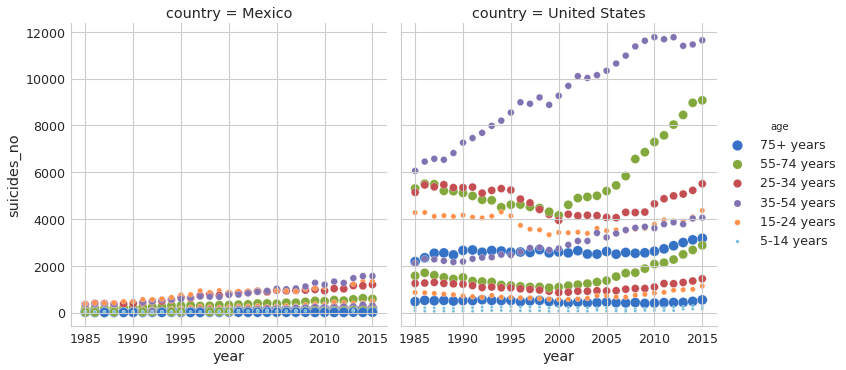

In [400]:
#suicides_no vs. year by generation
#fig, ax = plt.subplots(figsize=(6,7))
sns.relplot(data = both_countries, x = 'year', size = 'age',
                y = 'suicides_no', sizes=(10, 100), hue = 'age', col = 'country')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

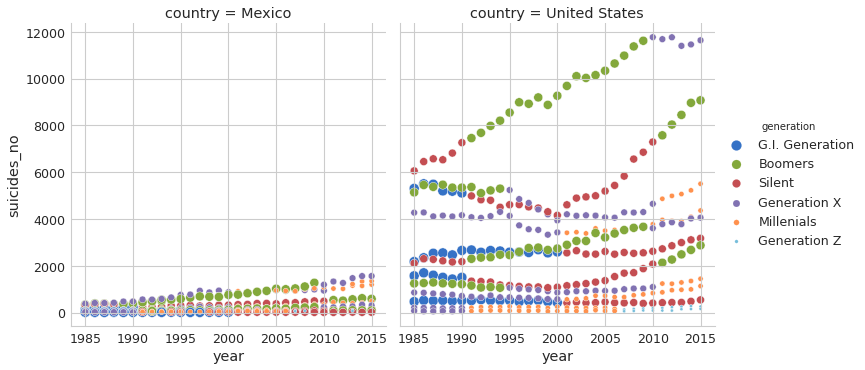

In [401]:
sns.relplot(data = both_countries, x = 'year', size = 'generation',
                y = 'suicides_no', sizes=(10, 100), hue = 'generation', col = 'country')